# Project Name- Rating Prediction Project 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('Amazon_ratings_dataset')

In [3]:
df

,Product Reviews,Product Rating
0,"Good laptop for students, not a gaming laptop....",5.0
1,Amazing screen quality and well designed keybo...,5.0
2,The laptop is so small and very light weight. ...,5.0
3,I jumped to the surface after using a MacBook ...,5.0
4,Best laptop in its segment. Everything you ex...,5.0
...,...,...
20395,Amazon delivered me damaged monitors twice and...,5.0
20396,I was looking for a bigger monitor after using...,5.0
20397,"Cons: Screen Bleeding at bottom side, it is ex...",5.0
20398,where bad product and amazon is rising prices ...,5.0


In [6]:
df.head()

,Product Reviews,Product Rating
0,"Good laptop for students, not a gaming laptop....",5.0
1,Amazing screen quality and well designed keybo...,5.0
2,The laptop is so small and very light weight. ...,5.0
3,I jumped to the surface after using a MacBook ...,5.0
4,Best laptop in its segment. Everything you ex...,5.0


In [8]:
df.shape

(20400, 2)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20400 entries, 0 to 20399
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Product Reviews  20335 non-null  object 
 1   Product Rating   20400 non-null  float64
dtypes: float64(1), object(1)
memory usage: 318.9+ KB


In [10]:
df.isnull().sum()

Product Reviews    65
Product Rating      0
dtype: int64

In [12]:
# removing null values
df.dropna(inplace=True)

In [13]:
df.shape

(20335, 2)

In [14]:
df.isnull().sum()

Product Reviews    0
Product Rating     0
dtype: int64

In [16]:
df['Product Rating'].value_counts()

5.0    4665
1.0    4263
4.0    4165
3.0    3646
2.0    3596
Name: Product Rating, dtype: int64

In [18]:
df['Product Reviews'].value_counts()

Good                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                    

In [20]:
#converting all reviews in lower case
df['Product Reviews']=df['Product Reviews'].str.lower()

In [21]:
df['Product Reviews'].head()

0    good laptop for students, not a gaming laptop....
1    amazing screen quality and well designed keybo...
2    the laptop is so small and very light weight. ...
3    i jumped to the surface after using a macbook ...
4     best laptop in its segment. everything you ex...
Name: Product Reviews, dtype: object

In [26]:
#adding the review length column into the dataframe
df['Review length']=df['Product Reviews'].str.len()
df.head()

,Product Reviews,Product Rating,Review length
0,"good laptop for students, not a gaming laptop....",5.0,319
1,amazing screen quality and well designed keybo...,5.0,191
2,the laptop is so small and very light weight. ...,5.0,307
3,i jumped to the surface after using a macbook ...,5.0,613
4,best laptop in its segment. everything you ex...,5.0,152


### Removing Punctuations

In [28]:
# Replace email addresses with 'email'
df['Product Reviews']=df['Product Reviews'].str.replace(r'^.+@[^\.].*\.[a-z]{2,}$',
                                 'emailaddress')

# Replace URLs with 'webaddress'
df['Product Reviews']=df['Product Reviews'].str.replace(r'^http\://[a-zA-Z0-9\-\.]+\.[a-zA-Z]{2,3}(/\S*)?$',
                                  'webaddress')

# Replace 10 digit phone numbers (formats include paranthesis, spaces, no spaces, dashes) with 'phonenumber'
df['Product Reviews']=df['Product Reviews'].str.replace(r'^\(?[\d]{3}\)?[\s-]?[\d]{3}[\s-]?[\d]{4}$',
                                  'phonenumber')

In [29]:
#Removing the pucntuations
df['Product Reviews']=df['Product Reviews'].str.replace(r'[^\w\d\s]', ' ')

# Replace whitespace between terms with a single space
df['Product Reviews']=df['Product Reviews'].str.replace(r'\s+', ' ') 

# Remove leading and trailing whitespace
df['Product Reviews']=df['Product Reviews'].str.replace(r'^\s+|\s+?$', '')

### Removing Stopwords

In [31]:
import string
import nltk
from nltk.corpus import  stopwords

stop_words = set(stopwords.words('english') + ['u', 'ü', 'ur', '4', '2', 'im', 'dont', 'doin', 'ure'])

df['Product Reviews'] = df['Product Reviews'].apply(lambda x: ' '.join(
    term for term in x.split() if term not in stop_words))

In [32]:
df.head()

,Product Reviews,Product Rating,Review length
0,good laptop students gaming laptop screen clea...,5.0,319
1,amazing screen quality well designed keyboard ...,5.0,191
2,laptop small light weight pros 1 aluminium bui...,5.0,307
3,jumped surface using macbook pro 10 years comp...,5.0,613
4,best laptop segment everything expect heats wh...,5.0,152


### Lemmatization and stemming with Snowball

In [34]:
# writing function for the entire dataset
# Lemmatizing and then Stemming with Snowball to get root words and further reducing characters

from nltk.stem import SnowballStemmer, WordNetLemmatizer
stemmer = SnowballStemmer("english")
import gensim
def lemmatize_stemming(text):
    return stemmer.stem(WordNetLemmatizer().lemmatize(text,pos='v'))

#Tokenize and Lemmatize
def preprocess(text):
    result=[]
    for token in text:
        if len(token)>=3:
            result.append(lemmatize_stemming(token))
            
    return result

In [35]:
df

,Product Reviews,Product Rating,Review length
0,good laptop students gaming laptop screen clea...,5.0,319
1,amazing screen quality well designed keyboard ...,5.0,191
2,laptop small light weight pros 1 aluminium bui...,5.0,307
3,jumped surface using macbook pro 10 years comp...,5.0,613
4,best laptop segment everything expect heats wh...,5.0,152
...,...,...,...
20395,amazon delivered damaged monitors twice even l...,5.0,248
20396,looking bigger monitor using 22 inch dell moni...,5.0,344
20397,cons screen bleeding bottom side expected mode...,5.0,391
20398,bad product amazon rising prices products go a...,5.0,112


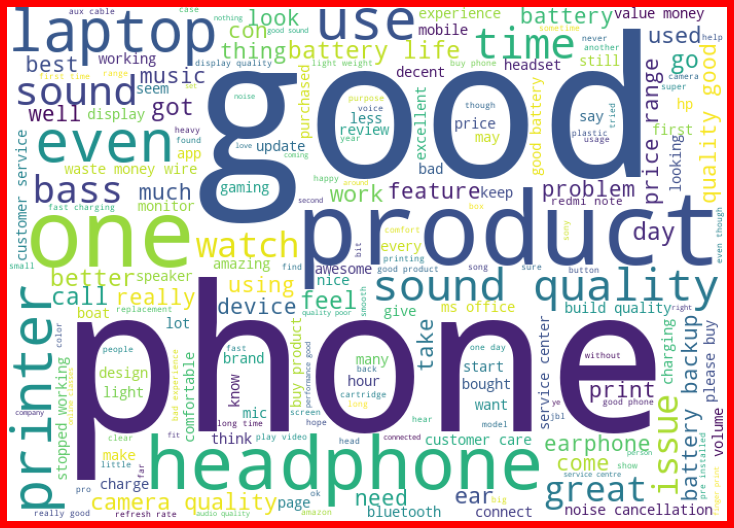

In [38]:
                                 ''' #Getting sense of words in Rating 1 '''

from wordcloud import WordCloud
one = df['Product Reviews'][df['Product Rating']==1]

one_cloud = WordCloud(width=700,height=500,background_color='white',max_words=200).generate(' '.join(one))

plt.figure(figsize=(10,8),facecolor='r')
plt.imshow(one_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

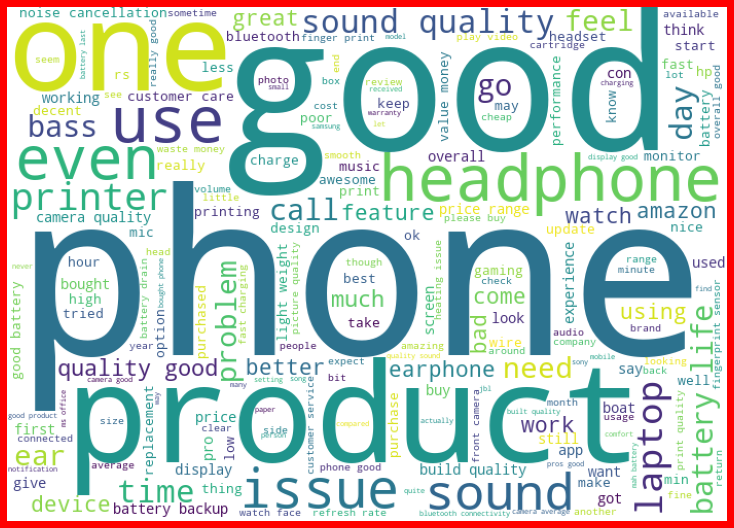

In [39]:
                               ''' Getting sense of words in Rating 2 '''
    
    
one = df['Product Reviews'][df['Product Rating']==2]

one_cloud = WordCloud(width=700,height=500,background_color='white',max_words=200).generate(' '.join(one))

plt.figure(figsize=(10,8),facecolor='r')
plt.imshow(one_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

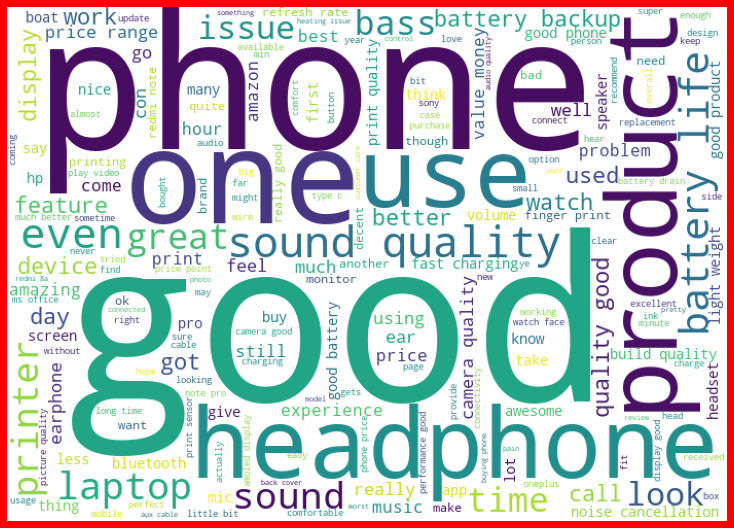

In [41]:
                               ''' Getting sense of words in Rating 3 '''

    
one = df['Product Reviews'][df['Product Rating']==3]

one_cloud = WordCloud(width=700,height=500,background_color='white',max_words=200).generate(' '.join(one))

plt.figure(figsize=(10,8),facecolor='r')
plt.imshow(one_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

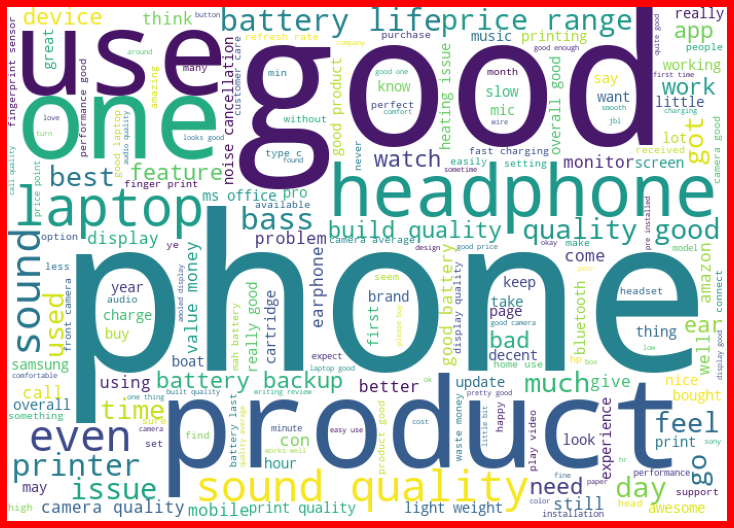

In [42]:
                               ''' Getting sense of words in Rating 4 '''


one = df['Product Reviews'][df['Product Rating']==4]

one_cloud = WordCloud(width=700,height=500,background_color='white',max_words=200).generate(' '.join(one))

plt.figure(figsize=(10,8),facecolor='r')
plt.imshow(one_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

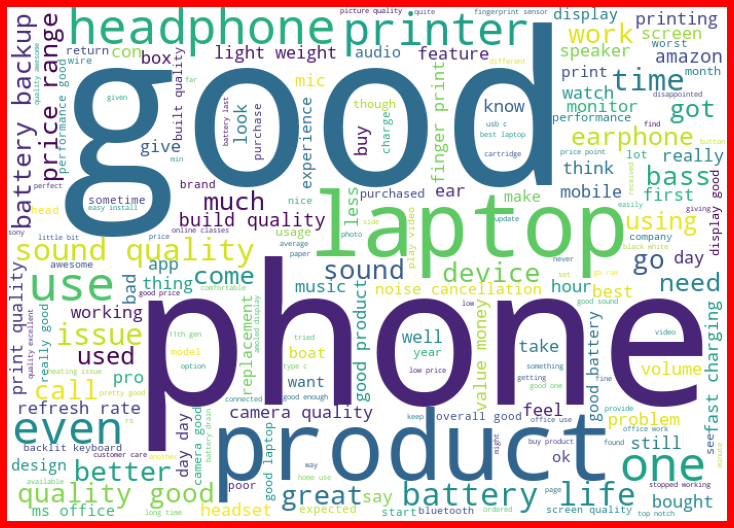

In [44]:
                               ''' Getting sense of words in Rating 5 '''


one = df['Product Reviews'][df['Product Rating']==5]

one_cloud = WordCloud(width=700,height=500,background_color='white',max_words=200).generate(' '.join(one))

plt.figure(figsize=(10,8),facecolor='r')
plt.imshow(one_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

### Transforming words into Vectors using TF-IDF

In [45]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
tf_vec = TfidfVectorizer()
features = tf_vec.fit_transform(df['Product Reviews'])


# Spliting the feature and label

x = features
y = df['Product Rating']

In [46]:
print("shape of x is :",x.shape)
print("shape of y is :",y.shape)

shape of x is : (20335, 12561)
shape of y is : (20335,)


### Model Building

In [47]:
# Importing required libraries
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression,PassiveAggressiveClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier

# Model selection libraries
from sklearn.model_selection import cross_val_score, cross_val_predict, train_test_split
from sklearn.model_selection import GridSearchCV


# Importing metrics to evaluate the model's performance 
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import roc_auc_score, roc_curve, auc
from sklearn.metrics import precision_score, recall_score, f1_score


# Creating instances for different Classifiers
LR=LogisticRegression()
MNB=MultinomialNB()
PAC=PassiveAggressiveClassifier()
DT=DecisionTreeClassifier()
Ad=AdaBoostClassifier()
RF=RandomForestClassifier()

In [48]:
# Putting Scikit-Learn machine learning Models in a list so that it can be used for further evaluation in loop.
models=[]
models.append(('MultinomialNB',MNB))
models.append(('PassiveAggressiveClassifier',PAC))
models.append(('DecisionTreeClassifier',DT))
models.append(('AdaBoostClassifier',Ad))
models.append(('RandomForestClassifier',RF))

In [49]:
# Finding best Random State and Maximum Accuracy Score
def max_acc_score(clf,x,y):
    max_acc_score=0
    final_r_state=0
    for r_state in range(42,100):
        x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=r_state,stratify=y)
        clf.fit(x_train,y_train)
        y_pred=clf.predict(x_test)
        acc_score=accuracy_score(y_test,y_pred)
        if acc_score > max_acc_score:
            max_acc_score=acc_score
            final_r_state=r_state
    print('Max Accuracy Score corresponding to Random State ', final_r_state, 'is:', max_acc_score)
    print('\n')
    return final_r_state

In [50]:
Model=[]
Score=[]
Acc_score=[]

#            For Loop to Calculate Accuracy Score, Cross Val Score, Classification Report, Confusion Matrix

for name,model in models:
    print('======================',name,'======================')
    print('\n')
    Model.append(name)
    print(model)
    print('\n')
    
     #        Now, calling a function which will give the max accuracy score for each model 
     #                               and return best random state.
    r_state=max_acc_score(model,x,y)
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=r_state,stratify=y)
    model.fit(x_train,y_train)
#..............Learning Score...........
    score=model.score(x_train,y_train)
    print('Learning Score : ',score)
    Score.append(score*100)
    y_pred=model.predict(x_test)
    acc_score=accuracy_score(y_test,y_pred)
    print('Accuracy Score : ',acc_score)
    Acc_score.append(acc_score*100)

#................Classification Report...........................      
    print('Classification Report:\n',classification_report(y_test,y_pred))
    print('\n')
    
    print('Confusion Matrix:\n',confusion_matrix(y_test,y_pred))
    print('\n')

====================== MultinomialNB ======================


MultinomialNB()


Max Accuracy Score corresponding to Random State  47 is: 0.40649073922307816


Learning Score :  0.5222003653224674
Accuracy Score :  0.40649073922307816
Classification Report:
               precision    recall  f1-score   support

         1.0       0.43      0.52      0.47      1279
         2.0       0.41      0.21      0.28      1079
         3.0       0.42      0.24      0.31      1094
         4.0       0.42      0.38      0.40      1249
         5.0       0.38      0.60      0.47      1400

    accuracy                           0.41      6101
   macro avg       0.41      0.39      0.38      6101
weighted avg       0.41      0.41      0.39      6101



Confusion Matrix:
 [[664  41 152 152 270]
 [243 227  54 224 331]
 [158  73 267 121 475]
 [308  68  95 476 302]
 [175 141  75 163 846]]


====================== PassiveAggressiveClassifier ======================


PassiveAggressiveClassifier()


Max Ac

In [51]:
score=pd.DataFrame({'Model':Model,'Learning Score':score,'Accuracy Score ':acc_score})
score

,Model,Learning Score,Accuracy Score
0,MultinomialNB,0.63819,0.457466
1,PassiveAggressiveClassifier,0.63819,0.457466
2,DecisionTreeClassifier,0.63819,0.457466
3,AdaBoostClassifier,0.63819,0.457466
4,RandomForestClassifier,0.63819,0.457466


<AxesSubplot:>

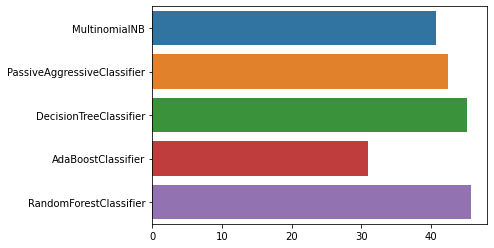

In [52]:
sns.barplot(y=Model,x=Acc_score)

### Final Model

In [53]:
RF=RandomForestClassifier()
RF.fit(x_train,y_train)
RF_pred=RF.predict(x_test)
print(accuracy_score(y_test,RF_pred))
print(confusion_matrix(y_test,RF_pred))
print(classification_report(y_test,RF_pred))

0.4556630060645796
[[623  67 245 166 178]
 [126 473  60 245 175]
 [187  79 445  95 288]
 [290 160 119 571 109]
 [112 265 176 179 668]]
              precision    recall  f1-score   support

         1.0       0.47      0.49      0.48      1279
         2.0       0.45      0.44      0.45      1079
         3.0       0.43      0.41      0.42      1094
         4.0       0.45      0.46      0.46      1249
         5.0       0.47      0.48      0.47      1400

    accuracy                           0.46      6101
   macro avg       0.45      0.45      0.45      6101
weighted avg       0.46      0.46      0.46      6101



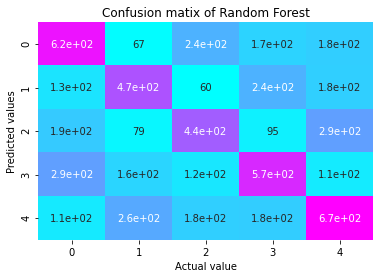

In [54]:
#Lets plot confusion Matrix
cm=confusion_matrix(y_test,RF_pred)
sns.heatmap(cm,annot=True,cbar=False,cmap='cool')
plt.xlabel('Actual value')
plt.ylabel('Predicted values')
plt.title('Confusion matix of Random Forest')
plt.show()

In [55]:
#checking the predicted values
test=pd.DataFrame(data=y_test,)
test['Predicted values']=RF_pred

test.to_csv('Ratings_Predict.csv')

test

,Product Rating,Predicted values
18861,1.0,1.0
19909,1.0,1.0
11667,2.0,4.0
19921,5.0,4.0
19260,4.0,4.0
...,...,...
9987,4.0,1.0
15851,4.0,1.0
17875,1.0,1.0
10649,3.0,2.0


In [56]:
#saving the model
import joblib
joblib.dump(RF,'Rating_Prediction.pkl')

['Rating_Prediction.pkl']